## This notebook is dedicated to linear regression analysis

In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [6]:
import os
os.listdir()

['.ipynb_checkpoints',
 '1_Data_import_visulization-wjlee.ipynb',
 '1_Data_import_visulization.ipynb',
 '2_Cost_function.ipynb',
 '3_gradient_descent.ipynb',
 'cost function.ipynb',
 'gradient descent.ipynb',
 'newplot.png',
 'Untitled.ipynb',
 'y w_x + b.ipynb']

In [7]:
# !pip install wget
# !pip install pandas
# !pip install matplotlib
# !pip install plotly
# !pip install ipywidgets

In [9]:
# # download the data
import wget
url = "https://raw.githubusercontent.com/waccoco/2024_NCTU_MI_course/master/Dataset/Salary_Data.csv"
output_path = './Salary_Data.csv'
wget.download(url, out=output_path)

'./Salary_Data.csv'

### Shear a dataset using the URL from github
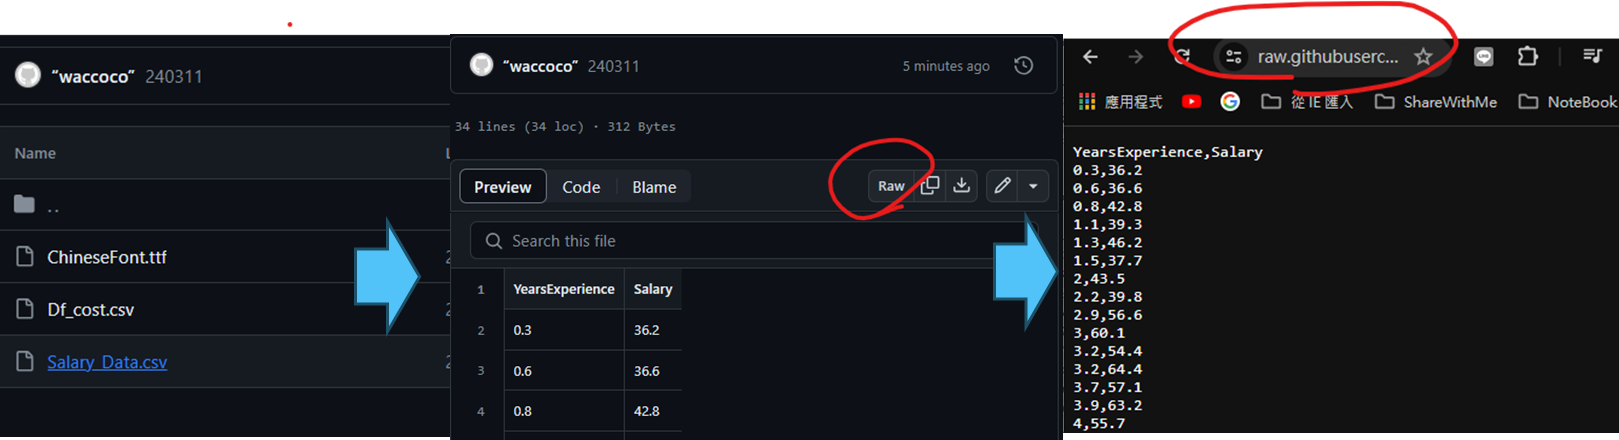

In [11]:
import numpy as np

# 設定 a 和 b 的值
a = 7  # 假設 a 為 2
b = 3  # 假設 b 為 1

# 決定 x 的範圍和數量
x = np.linspace(0, 12, 500)  # 從 -10 到 10 生成 100 個點

# 計算對應的 y 值，並加入一些隨機性來模擬真實世界數據的波動
y = a * x + b + np.random.normal(0, 5, x.shape)

# 顯示前幾個生成的點來確認
y[:10]

array([ 2.33786404,  6.11300411,  0.7731553 ,  0.4547789 , -0.94047808,
        8.22066938,  3.71815301, -1.11950959,  2.13879981,  7.05999448])

In [ ]:
import pandas as pd

output_path = './Salary_Data.csv'

path = output_path
df = pd.read_csv(output_path)

# y = w*x + b
x = df["YearsExperience"]
y = df["Salary"]
df.head(5)

### Exercise : Please try to download waccoco/../Dataset/ChineseFont.ttf from my github

In [ ]:
url = "https://raw.githubusercontent.com/waccoco/2024_NCTU_MI_course/master/Dataset/ChineseFont.ttf"
output_path = './ChineseFont.ttf'
wget.download(url, out=output_path)

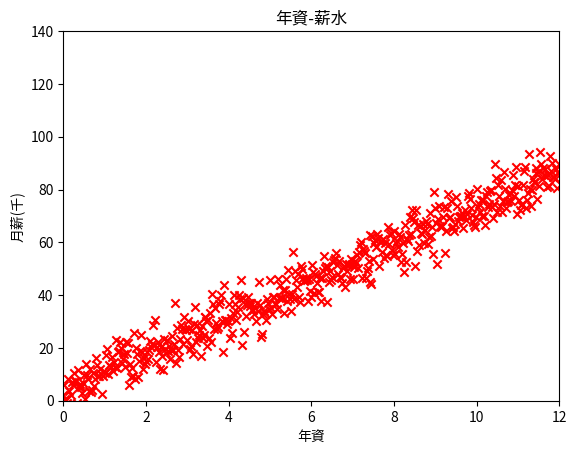

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.scatter(x, y, marker="x", color="red")
plt.axis((0,12, 0,140))
plt.title("年資-薪水")
plt.xlabel("年資")
plt.ylabel("月薪(千)")
plt.show()

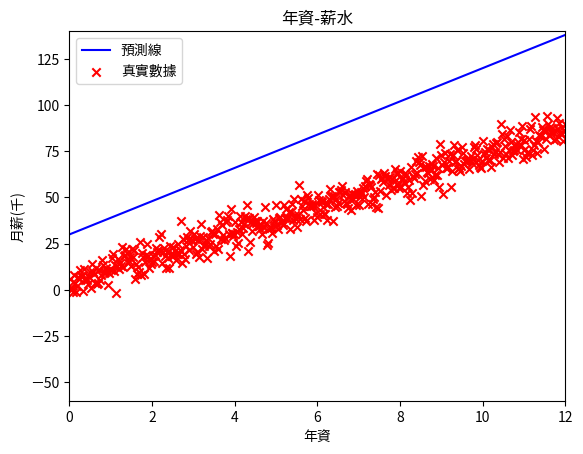

In [17]:
def plot_pred(w, b):
  y_pred = x*w + b
  plt.plot(x, y_pred, color="blue", label="預測線")
  plt.scatter(x, y, marker="x", color="red", label="真實數據")
  plt.title("年資-薪水")
  plt.xlabel("年資")
  plt.ylabel("月薪(千)")
  plt.xlim([0, 12])
  plt.ylim([-60, 140])
  plt.legend()
  plt.show()

plot_pred(9, 30)

In [18]:
from ipywidgets import interact

interact(plot_pred, w=(-100, 100, 1), b=(-100, 100, 1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

In [23]:
import plotly.express as px
fig = px.scatter(x, y)
fig.show()

In [26]:
# !pip install dash
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive scatter plot with Iris dataset'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by petal width:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=2.5, step=0.1,
        marks={0: '0', 2.5: '2.5'},
        value=[0.5, 2]
    ),
])


@app.callback(
    Output("scatter-plot", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = px.data.iris() # replace with your own data source
    low, high = slider_range
    mask = (df['petal_width'] > low) & (df['petal_width'] < high)
    fig = px.scatter(
        df[mask], x="sepal_width", y="sepal_length", 
        color="species", size='petal_length', 
        hover_data=['petal_width'])
    return fig
    
# app.run_server(debug=True)
app.run_server(debug=True, port=8051)


# 建立服務

若設置的port=8051

Dash伺服器在本地主機上運行UI http://localhost:8051/
        
其他裝置可以使用位址來訪問您的Dash應用程式  http://your_local_ip:8051/